In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os, sqlite3

path_to_db     = r'/Users/Guille/Desktop/india_power/database/'
path_to_images = r'/Users/Guille/Desktop/india_power/images/'

## Biomass and Bagasse capacity factors estimation

In [2]:
path_to_pc = r'/Users/Guille/Desktop/india_power/database/CEA-RES-2020/PC/'
path_to_ed = r'/Users/Guille/Desktop/india_power/database/CEA-RES-2020/ED/'

ED_bagasse_     = pd.read_csv(path_to_ed + r'ED_bagasse_2020.csv').to_numpy()
ED_biomass_     = pd.read_csv(path_to_ed + r'ED_biomass_2020.csv')
PC_all_biomass_ = pd.read_csv(path_to_pc + r'PC_Biomass_2022.csv').to_numpy()
columns_        = ED_biomass_.columns.values[1:]
ED_biomass_     = ED_biomass_.to_numpy()
print(ED_bagasse_.shape, ED_biomass_.shape, PC_all_biomass_.shape)

load_zones_ = ['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
               'Dadra_Nagar_Haveli', 'Daman_Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
               'Himachal_Pradesh', 'Jammu_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
               'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
               'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu',
               'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']
print(len(load_zones_))

ttl_ed_ = []
ttl_pd_ = []
names_pc_      = PC_all_biomass_[:, 0]

names_biomass_ = ED_biomass_[:, 0]
names_bagasse_ = ED_bagasse_[:, 0]

print(names_biomass_)
pc_ = np.zeros((len(load_zones_), ))
ed_ = np.zeros((len(load_zones_), 12))
ed_bagasse_ = np.zeros((len(load_zones_), 12))
ed_biomass_ = np.zeros((len(load_zones_), 12))

for i in range(len(load_zones_)):
    for j in range(PC_all_biomass_.shape[0]):
        if load_zones_[i] == names_pc_[j]:
            pc_[i] = PC_all_biomass_[j, 1]
            break
    
    for j in range(ED_bagasse_.shape[0]):
        if load_zones_[i] == names_biomass_[j]:
            ed_bagasse_[i] = ED_bagasse_[j, 1:]
            break
            
    for j in range(ED_biomass_.shape[0]):
        if load_zones_[i] == names_biomass_[j]:
            ed_biomass_[i] = ED_biomass_[j, 1:]
            break
            

days_per_month_  = np.array([31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

ed_        = (ed_bagasse_ + ed_biomass_) * 1000.
ed_[15, :] = np.zeros((ed_.shape[1],))
pc_[15]    = 0.
cf_        = np.zeros(ed_.shape)

for i in range(ed_.shape[0]):
    cf_[i, :] = np.nan_to_num(ed_[i, :]/(pc_[i]*days_per_month_*24.))
    
#print(cf_.shape)
#print(months_)
cf_ = pd.DataFrame(cf_, index = load_zones_, columns = columns_)
ed_ = pd.DataFrame(ed_, index = load_zones_, columns = columns_)
pc_ = pd.DataFrame(pc_, index = load_zones_, columns = ['MW'])
# print(cf_)
# print(ed_)
# print(pc_)

cf_.to_csv(path_to_db + r'CF_biomass_2020.csv')
ed_.to_csv(path_to_db + r'ED_biomass_2020.csv')
pc_.to_csv(path_to_db + r'PC_biomass_2020.csv')

(43, 13) (43, 13) (29, 2)
33
['Chandigarh' 'Delhi' 'Haryana' 'Himachal_Pradesh' 'Jammu_Kashmir'
 'Ladakh' 'Punjab' 'Rajasthan' 'Uttar_Pradesh' 'Uttarakhand'
 'Northern Region' 'Chhattisgarh' 'Gujarat' 'Madhya_Pradesh' 'Maharashtra'
 'Dadra and Nagar Haveli' 'Daman_Diu' 'Goa' 'Western Region'
 'Andhra_Pradesh' 'Telangana' 'Karnataka' 'Kerala' 'Tamil_Nadu'
 'Lakshadweep' 'Puducherry' 'Southern Region' 'Andaman_Nicobar' 'Bihar'
 'Jharkhand' 'Odisha' 'Sikkim' 'West_Bengal' 'Eastern Region'
 'Arunachal_Pradesh' 'Assam' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Tripura' 'North Eastern Region' 'All India Total']


/var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/ipykernel_67317/2999385754.py:57: RuntimeWarning: invalid value encountered in true_divide
  cf_[i, :] = np.nan_to_num(ed_[i, :]/(pc_[i]*days_per_month_*24.))
/var/folders/0c/ffx2kgyn7xq4krqrpsv67l3m0000gn/T/ipykernel_67317/2999385754.py:57: RuntimeWarning: divide by zero encountered in true_divide
  cf_[i, :] = np.nan_to_num(ed_[i, :]/(pc_[i]*days_per_month_*24.))


## Biomass and Bagasse capacity to input format for csvs generation

In [24]:
#print(areas_)
regions_ = ['NR', 'WR', 'SR', 'ER', 'NER']

# #vom_inr_per_mwh = 4899.
# #heat_rate_mmbtu_mwh = 12.3
# #fuel_price = 0.
# #type = 'other'
# #status = 'existing'
# #'load_zone_abr'
# #region

path_to_csvs = r'/Users/Guille/Desktop/india_power/database/Biomass/'

gen_exist_  = pd.read_csv(path_to_csvs + r'existing_generators_2021.csv')
hydro_ed_   = pd.read_csv(path_to_csvs + r'hydro_monthly_data_2021.csv')
biomass_pc_ = pd.read_csv(path_to_csvs + r'PC_biomass_2020.csv')
biomass_ed_ = pd.read_csv(path_to_csvs + r'ED_biomass_2020.csv')
gp_zones_   = pd.read_csv(path_to_csvs + r'teri_gp_zones.csv').to_numpy()

biomass_pc_ = biomass_pc_.to_numpy()
biomass_exists_ = []
for i in range(zones_.shape[0]):
    for j in range(gp_zones_.shape[0]):
        if biomass_pc_[i, 0] == gp_zones_[j, 0]:
            #print(gp_zones_[j, 2], gp_zones_[j, 0], gp_zones_[j, 1])
            row_ = ['existing', gp_zones_[j, 2] + ' BPP', gp_zones_[j, 2], gp_zones_[j, 0], gp_zones_[j, 1], regions_[int(areas_[i])], 'Biomass', 'ohter', biomass_pc_[i, 1]]
            row_ += ['','','','', 4868, 12.3, '', '', 0]         
            if biomass_pc_[i, 1] > 0.: biomass_exists_.append(row_)
biomass_exists_ = pd.DataFrame(np.stack(biomass_exists_), columns = gen_exist_.columns)

biomass_exists_.to_csv(path_to_csvs + r'existing_biomass_generators_2022.csv', index = False)
                        
print(hydro_ed_.head())

print(biomass_ed_.shape)
biomass_ed_ = biomass_ed_.to_numpy()
biomass_dispath_ = []
for i in range(zones_.shape[0]):
    for j in range(gp_zones_.shape[0]):
        if biomass_pc_[i, 0] == gp_zones_[j, 0]: 
            for k in range(12):
                row_ = [gp_zones_[j, 2] + ' BPP', biomass_pc_[i, 1], 'Biomass', gp_zones_[j, 1], gp_zones_[j, 2], gp_zones_[j, 0], k + 1, biomass_ed_[i, k + 1]]
                if biomass_pc_[i, 1] > 0.: 
                    biomass_dispath_.append(row_)
            
print(np.stack(biomass_dispath_).shape, hydro_ed_.shape)
biomass_dispath_ = pd.DataFrame(np.stack(biomass_dispath_), columns = hydro_ed_.columns)
print(biomass_dispath_)

biomass_dispath_.to_csv(path_to_csvs + r'biomass_monthly_data_2020.csv')

IndexError: index 33 is out of bounds for axis 0 with size 33

## Connect to Dababase

In [10]:
def _connect_to_db(db_path, timeout      = 5, 
                            detect_types = 0):
    """
    :param db_path: str, the path to the database, relative to the
        current working directory, defaults to "../db/io.db"
    :param timeout: int, number of seconds the connection should wait for the
        database lock to go away before raising an exception, defaults to 5
    :param detect_types: int, type detection parameter, defaults to 0
    :return: the sqlite3 database connection object
    Connect to a database and return the connection object.
    """

    if not os.path.isfile(db_path):
        raise OSError("The database file {} was not found. Did you mean to "
                      "specify a different database file?".format(os.path.abspath(db_path)))

    conn = sqlite3.connect(db_path, timeout      = timeout, 
                                    detect_types = detect_types)

    # Enforce foreign keys (default = not enforced)
    conn.execute("PRAGMA foreign_keys=ON;")

    return conn

def _load_table(_conn, table_name):
    return pd.read_sql_query(f"SELECT * FROM {table_name}", _conn)

In [73]:
CEA_ED_ = pd.read_csv(path_to_db + r"india_2020_electricity_generation_v1.csv")
CEA_PC_ = pd.read_csv(path_to_db + r"india_2020_installed_capacity_v1.csv")
print(CEA_ED_.keys())
print(CEA_PC_.keys())

states_  = np.array(CEA_ED_['State/UT'])
idx_NR_  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
idx_WR_  = [10, 11, 12, 13, 14, 15, 16]
idx_SR_  = [17, 18, 19, 20, 21, 22, 23]
idx_ER_  = [24, 25, 26, 27, 28, 29]
idx_NER_ = [30, 31, 32, 33, 34, 35, 36, 37]
 
regions_ = ['NR', 'WR', 'SR', 'ER', 'NER']
areas_   = np.ones(states_.shape)
areas_[idx_NR_]  *= 0
areas_[idx_WR_]  *= 1
areas_[idx_SR_]  *= 2
areas_[idx_ER_]  *= 3
areas_[idx_NER_] *= 4

resources_ = ['Hydro', 'Steam', 'Diesel', 'Gas', 'Nuclear', 'RES',]

CEA_ED_ = np.stack([CEA_ED_['Steam'].to_numpy(),   CEA_ED_['Diesel'].to_numpy(), CEA_ED_['Gas'].to_numpy(),
                    CEA_ED_['Nuclear'].to_numpy(), CEA_ED_['Hydro'].to_numpy(),  CEA_ED_['RES'].to_numpy()]).astype(float)
CEA_PC_ = np.stack([CEA_PC_['Steam'].to_numpy(),   CEA_PC_['Diesel'].to_numpy(), CEA_PC_['Gas'].to_numpy(), 
                    CEA_PC_['Nuclear'].to_numpy(), CEA_PC_['Hydro'].to_numpy(),  CEA_PC_['RES'].to_numpy()]).astype(float)
print(states_.shape, CEA_ED_.shape, CEA_PC_.shape)

idx_states_  = np.linspace(0, states_.shape[-1] - 1, states_.shape[-1], dtype = int)
idx_centals_ = np.array([9, 16, 23, 29, 37])
idx_states_  = np.delete(idx_states_, idx_centals_)

index_  = np.argsort(states_[idx_states_])
states_ = states_[idx_states_][index_]
areas_  = areas_[idx_states_][index_]
print(states_.shape, areas_.shape)
print(states_)
print(areas_)

CEA_PC_states_   = np.around(CEA_PC_[:, idx_states_][:, index_]/1e3, 8)
CEA_PC_centrals_ = np.around(CEA_PC_[:, idx_centals_]/1e3, 8)
print(CEA_PC_states_.shape, CEA_PC_centrals_.shape)

CEA_ED_states_   = np.around(CEA_ED_[:, idx_states_][:, index_]/1e3, 8)
CEA_ED_centrals_ = np.around(CEA_ED_[:, idx_centals_]/1e3, 8)
print(CEA_ED_states_.shape, CEA_ED_centrals_.shape)

Index(['State/UT', 'Hydro', 'Steam', 'Diesel', 'Gas', 'Total Thermal',
       'Nuclear', 'RES', 'Total'],
      dtype='object')
Index(['State/UT', 'Hydro', 'Steam', 'Diesel', 'Gas', 'Total Thermal',
       'Nuclear', 'RES', 'Total'],
      dtype='object')
(38,) (6, 38) (6, 38)
(33,) (33,)
['Andhra_Pradesh' 'Arunachal_Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Daman_Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal_Pradesh' 'Jammu_Kashmir' 'Jharkhand' 'Karnataka' 'Kerala'
 'Madhya_Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil_Nadu'
 'Telangana' 'Tripura' 'Uttar_Pradesh' 'Uttarakhand' 'West_Bengal']
[2. 4. 4. 3. 0. 1. 1. 0. 1. 1. 0. 0. 0. 3. 2. 2. 1. 1. 4. 4. 4. 4. 3. 2.
 0. 0. 3. 2. 2. 4. 0. 0. 3.]
(6, 33) (6, 5)
(6, 33) (6, 5)


In [75]:
def _find_sate(state, states_):
    for i in range(len(states_)):
        if states_[i] == state:
            return i
    return None

CEA_PC_Wind_  = pd.read_csv(path_to_db + r"CEA-RES-2020/PC/PC_Wind_2020.csv")
CEA_PC_Solar_ = pd.read_csv(path_to_db + r"CEA-RES-2020/PC/PC_Solar_2020.csv")
CEA_PC_SHP_   = pd.read_csv(path_to_db + r"CEA-RES-2020/PC/PC_SHP_2020.csv")
print(CEA_PC_Wind_.keys())
print(CEA_PC_Solar_.keys())
print(CEA_PC_SHP_.keys())

CEA_PC_RES_states_ = np.zeros((3, 33))

for i in range(len(states_)):
    idx = _find_sate(states_[i], CEA_PC_Wind_['STATE'])
    if idx != None: CEA_PC_RES_states_[0, i] = CEA_PC_Wind_['Wind Power (MW)'][idx]
    
    idx = _find_sate(states_[i], CEA_PC_Solar_['State/UT'])
    if idx != None: CEA_PC_RES_states_[1, i] = CEA_PC_Solar_['Cumulative Capacity till 31-12-2019 (MW)'][idx]

    idx = _find_sate(states_[i], CEA_PC_SHP_['State'])
    if idx != None: CEA_PC_RES_states_[2, i] = CEA_PC_SHP_['Installed Projects Capacity (MW)'][idx]
print(CEA_PC_RES_states_.shape)

CEA_ED_wind_    = pd.read_csv(path_to_db + r"CEA-RES-2020/ED/ED_wind_2020.csv")
CEA_ED_solar_   = pd.read_csv(path_to_db + r"CEA-RES-2020/ED/ED_solar_2020.csv")
CEA_ED_shp_     = pd.read_csv(path_to_db + r"CEA-RES-2020/ED/ED_shp_2020.csv")
CEA_ED_biomass_ = pd.read_csv(path_to_db + r"CEA-RES-2020/ED/ED_biomass_2020.csv")
CEA_ED_biogas_  = pd.read_csv(path_to_db + r"CEA-RES-2020/ED/ED_bagasse_2020.csv")

def _get_ED(states_, CEA_ED_, CEA_ED_RES_states_, index = None):
    
    for i in range(len(states_)):
        idx = _find_sate(states_[i], CEA_ED_['State/UT'])
        if idx != None: 
            for key in CEA_ED_wind_.keys()[1:]:
                #print(states_[i], key)
                #print(CEA_ED_[key][idx])
                CEA_ED_RES_states_[index, i] += float(CEA_ED_[key][idx])
    return CEA_ED_RES_states_

CEA_ED_RES_states_ = np.zeros((5, 33))

CEA_ED_RES_states_ = _get_ED(states_, CEA_ED_wind_, CEA_ED_RES_states_, 0)
CEA_ED_RES_states_ = _get_ED(states_, CEA_ED_solar_, CEA_ED_RES_states_, 1)
CEA_ED_RES_states_ = _get_ED(states_, CEA_ED_shp_, CEA_ED_RES_states_, 2)
CEA_ED_RES_states_ = _get_ED(states_, CEA_ED_biomass_, CEA_ED_RES_states_, 3)
CEA_ED_RES_states_ = _get_ED(states_, CEA_ED_biogas_, CEA_ED_RES_states_, 4)
print(CEA_ED_RES_states_.shape)
print(np.sum(CEA_ED_RES_states_, axis = 1))

CEA_PC_RES_states_ /= 1e3
CEA_ED_RES_states_ /= 1e3

Index(['STATE', 'Wind Power (MW)'], dtype='object')
Index(['State/UT', 'Cumulative Capacity till 31-12-2019 (MW)'], dtype='object')
Index(['State', 'Installed Projects Capacity (MW)',
       'Projects under Implementation Capacity (MW)'],
      dtype='object')
(3, 33)
(5, 33)
[60142.99 59845.68 11035.57  3471.28 10927.3 ]


In [104]:
CEA_PC_ = np.zeros((6, 33))
CEA_ED_ = np.zeros((6, 33))

print(np.unique(areas_), areas_.shape)
for i in np.unique(areas_):
    idx_ = areas_ == i
    i    = int(i)
    CEA_PC_[:, idx_] = CEA_PC_states_[..., idx_] + CEA_PC_centrals_[:, i][:, np.newaxis] @ np.ones((1, idx_.sum()))/idx_.sum()
    CEA_ED_[:, idx_] = CEA_ED_states_[..., idx_] + CEA_ED_centrals_[:, i][:, np.newaxis] @ np.ones((1, idx_.sum()))/idx_.sum()

CEA_PC_ = np.delete(CEA_PC_, [1, -1], axis = 0)
CEA_ED_ = np.delete(CEA_ED_, [1, -1], axis = 0)
print(CEA_PC_.shape, CEA_ED_.shape)
print(CEA_PC_RES_states_.shape)

CEA_PC_[-1, :] += CEA_PC_RES_states_[-1, :]
CEA_ED_[-1, :] += CEA_ED_RES_states_[2, :]

CEA_PC_ = np.concatenate([CEA_PC_, CEA_PC_RES_states_[1, :][np.newaxis, :], CEA_PC_RES_states_[0, :][np.newaxis, :]], axis = 0)
CEA_ED_ = np.concatenate([CEA_ED_, CEA_ED_RES_states_[1, :][np.newaxis, :], CEA_ED_RES_states_[0, :][np.newaxis, :]], axis = 0)
print(CEA_PC_.shape, CEA_ED_.shape)

[0. 1. 2. 3. 4.] (33,)
(4, 33) (4, 33)
(3, 33)
(6, 33) (6, 33)


['Battery' 'Biomass' 'CCGT' 'CT' 'Diesel' 'Hydro_Pumped' 'Hydro_ROR'
 'Hydro_Storage' 'Nuclear' 'Solar' 'Subcritical_Coal_Large'
 'Subcritical_Coal_Small' 'Supercritical_Coal' 'WHR' 'Wind']
Index(['scenario_id', 'project', 'period', 'subproblem_id', 'stage_id',
       'capacity_type', 'technology', 'load_zone', 'energy_target_zone',
       'carbon_cap_zone', 'capacity_mw', 'hyb_gen_capacity_mw',
       'hyb_stor_capacity_mw', 'energy_capacity_mwh',
       'fuel_prod_capacity_fuelunitperhour',
       'fuel_rel_capacity_fuelunitperhour', 'fuel_stor_capacity_fuelunit',
       'new_build_mw', 'new_build_mwh', 'new_build_binary', 'retired_mw',
       'retired_binary', 'new_fuel_prod_capacity_fuelunitperhour',
       'new_fuel_rel_capacity_fuelunitperhour',
       'new_fuel_stor_capacity_fuelunit'],
      dtype='object')
Index(['scenario_id', 'subproblem_id', 'stage_id', 'period', 'load_zone',
       'technology', 'spinup_or_lookahead', 'energy_mwh'],
      dtype='object')
1 (5, 15, 34) (15,

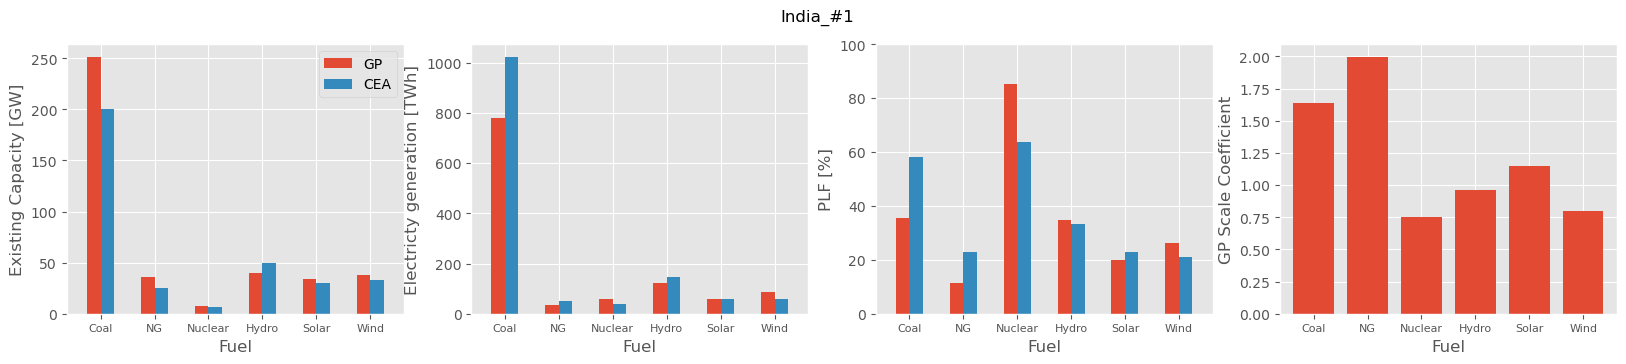

4 (5, 15, 34) (15, 34)


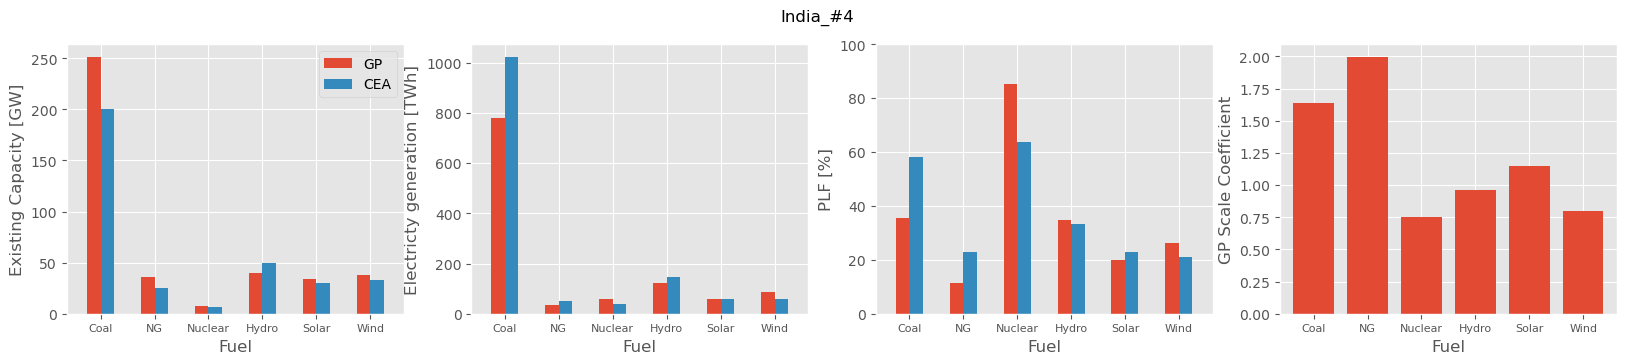

7 (5, 15, 34) (15, 34)


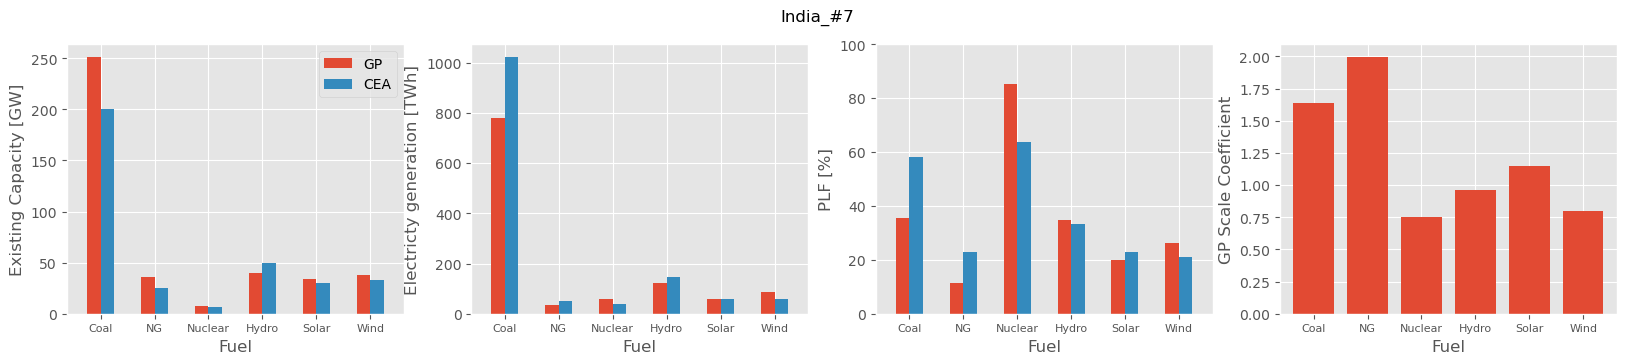

9 (5, 15, 34) (15, 34)


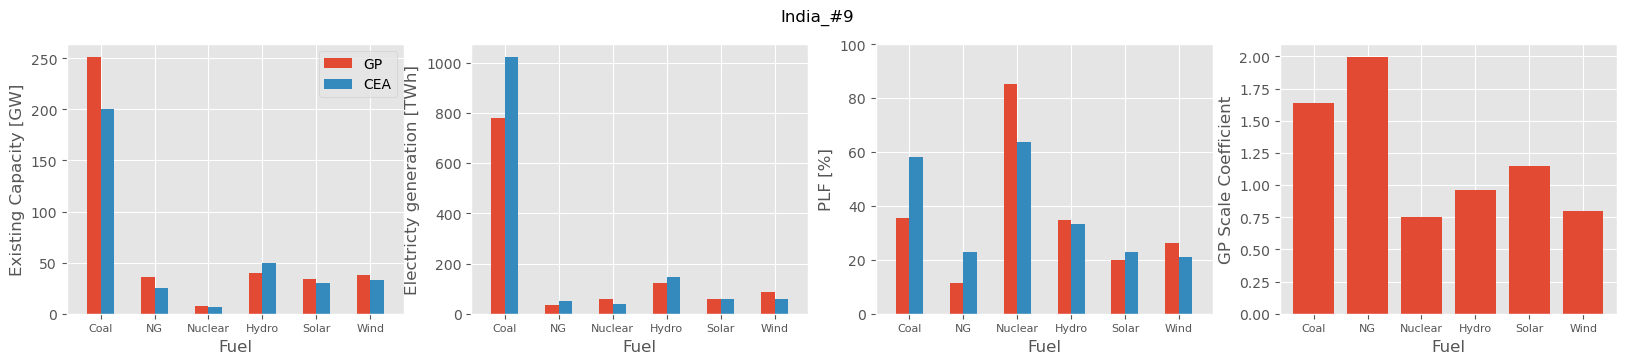

14 (5, 15, 34) (15, 34)


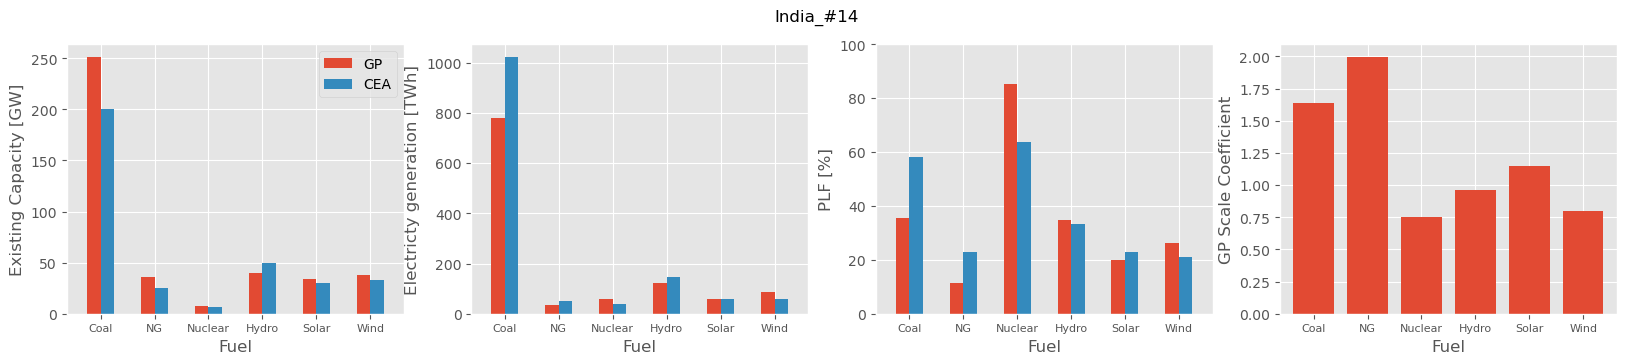

In [114]:
def _get_capacity(Cap_, scenario_id, period):
    index_  = (Cap_['scenario_id'] == scenario_id) & (Cap_['period'] == period)        
    tech_   = np.unique(Cap_['technology'])
    zones_  = np.unique(Cap_['load_zone'])
    GP_PC_  = np.ones((5, np.unique(Cap_['technology']).shape[0], np.unique(Cap_['load_zone']).shape[0]))*1e-25
    for i in range(tech_.shape[0]):
        for j in range(zones_.shape[0]):
            idx_            = index_ & (Cap_['technology'] == tech_[i]) & (Cap_['load_zone'] == zones_[j]) 
            GP_PC_[0, i, j] = np.sum(np.nan_to_num(np.array(Cap_[idx_]['capacity_mw'], dtype = float)))
            GP_PC_[1, i, j] = np.sum(np.nan_to_num(np.array(Cap_[idx_]['energy_capacity_mwh'], dtype = float)))
            GP_PC_[2, i, j] = np.sum(np.nan_to_num(np.array(Cap_[idx_]['new_build_mw'], dtype = float)))
            GP_PC_[3, i, j] = np.sum(np.nan_to_num(np.array(Cap_[idx_]['new_build_mwh'], dtype = float)))
            GP_PC_[4, i, j] = np.sum(np.nan_to_num(np.array(Cap_[idx_]['retired_mw'], dtype = float)))
    return GP_PC_


def _get_dispatch(DispatchTechPer_, scenario_id, period):
    index_ = (DispatchTechPer_['scenario_id'] == scenario_id) & (DispatchTechPer_['period'] == period)        
    tech_  = np.unique(DispatchTechPer_['technology'])
    zones_ = np.unique(DispatchTechPer_['load_zone'])
    GP_ED_ = np.ones((np.unique(DispatchTechPer_['technology']).shape[0], np.unique(DispatchTechPer_['load_zone']).shape[0]))*1e-25
    for i in range(tech_.shape[0]):
        for j in range(zones_.shape[0]):
            idx_     = index_ & (DispatchTechPer_['technology'] == tech_[i]) & (DispatchTechPer_['load_zone'] == zones_[j]) 
            try: GP_ED_[i, j] = np.nan_to_num(np.array(DispatchTechPer_[idx_]['energy_mwh'], dtype = float))
            except:
                #print(tech_[i], zones_[j], DispatchTechPer_[idx_]['energy_mwh'].shape)
                continue
    return GP_ED_

def _compare(GP_PC_, CEA_PC_, GP_ED_, CEA_ED_, title):

    GP_x_  = np.linspace(0, GP_PC_p_.shape[0] - 1, GP_PC_p_.shape[0])
    CEA_x_ = np.linspace(0, CEA_PC_.shape[0] - 1, CEA_PC_.shape[0]) + .25

    sources_ = ['Coal', 'NG', 'Nuclear', 'Hydro', 'Solar', 'Wind']
    x_       = np.linspace(0, len(sources_) - 1, len(sources_)) + .125

    file_name = r'{}_GPvsCEA2020.pdf'.format(title)

    plt.figure(figsize = (20, 3.5))
    plt.suptitle(title)
    plt.subplot(141)
    #plt.title("Power Capacity")
    plt.bar(GP_x_, np.sum(GP_PC_, axis = 1), width = .25, label = 'GP')
    plt.bar(CEA_x_, np.sum(CEA_PC_, axis = 1), width = .25, label = 'CEA')
    plt.xticks(x_, sources_, fontsize = 8, rotation = 0)
    plt.xlim(-0.5, 5.75)
    plt.ylabel('Existing Capacity [GW]')
    plt.xlabel('Fuel')
    plt.legend()

    plt.subplot(142)
    #plt.title("Energy Dispatch")
    plt.bar(GP_x_, np.sum(GP_ED_, axis = 1), width = .25, label = 'GP')
    plt.bar(CEA_x_, np.sum(CEA_ED_, axis = 1), width = .25, label = 'CEA')
    plt.xticks(x_, sources_, fontsize = 8, rotation = 0)
    plt.xlim(-0.5, 5.75)
    plt.ylabel('Electricty generation [TWh]')
    plt.xlabel('Fuel')

    GP_PLF_  = 100.*(np.sum(GP_ED_p_, axis = 1)*1e3)/(24*365*np.sum(GP_PC_p_, axis = 1))
    CEA_PLF_ = 100.*(np.sum(CEA_ED_, axis = 1)*1e3)/(24*365*np.sum(CEA_PC_, axis = 1))

    plt.subplot(143)
    #plt.title("Plant Load Factor")
    plt.bar(GP_x_, GP_PLF_, width = .25, label = 'GP')
    plt.bar(CEA_x_, CEA_PLF_, width = .25, label = 'CEA')
    plt.xticks(x_, sources_, fontsize = 8, rotation = 0)
    plt.ylabel('PLF [%]')
    plt.xlabel('Fuel')
    plt.xlim(-0.5, 5.75)
    plt.ylim(0, 100)
    
    AF_ = 100.*(np.sum(CEA_ED_, axis = 1)*1e3)/(24*365*np.sum(GP_PC_, axis = 1))
    
    plt.subplot(144)
    #plt.title("Availability Factor")
    plt.bar(x_, CEA_PLF_/GP_PLF_, width = .75)
    plt.ylabel('GP Scale Coefficient')
    plt.xticks(x_, sources_, fontsize = 8, rotation = 0)
    plt.xlabel('Fuel')
    plt.xlim(-0.5, 5.75)
    plt.savefig(path_to_images + file_name, bbox_inches = 'tight', dpi = 300)
    plt.show()


sources_ = ['Coal', 'Diesel', 'NG', 'Nuclear', 'Hydro', 'RE']
Coal_    = ['Subcritical_Coal_Small', 'Supercritical_Coal', 'Subcritical_Coal_Large']
NG_      = ['CCGT', 'CT']
Nuclear_ = ['Nuclear']
Hydro_   = ['Hydro_Pumped', 'Hydro_Storage', 'Hydro_ROR']
Solar_   = ['Solar']
Wind_    = ['Wind']
print(tech_)

# Open Connection to database
db_name = 'india-20230718-base.db'
_conn   = _connect_to_db(path_to_db + db_name)
_cursor = _conn.cursor()
tables_ = _cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()  

Cap_             = _load_table(_conn, "results_project_capacity")
DispatchTechPer_ = _load_table(_conn, "results_project_dispatch_by_technology_period")
print(Cap_.keys())
print(DispatchTechPer_.keys())

scens_ = np.unique(Cap_['scenario_id'])
zones_ = np.unique(Cap_['load_zone'])

for scen in scens_:
    GP_PC_ = _get_capacity(Cap_, scen, period = 2020)
    GP_ED_ = _get_dispatch(DispatchTechPer_, scen, period= 2020)
    print(scen, GP_PC_.shape, GP_ED_.shape)

    # GP technologies in CEA format
    non_comon_zones_ = np.setxor1d(states_, zones_)

    technologies_ = np.ones(tech_.shape, dtype = int)

    for coal in Coal_:       technologies_[tech_ == coal] *= 0
    for gas in NG_:          technologies_[tech_ == gas] *= 1
    for nuclear in Nuclear_: technologies_[tech_ == nuclear] *= 2
    for hydro in Hydro_:     technologies_[tech_ == hydro] *= 3
    for solar in Solar_:     technologies_[tech_ == solar] *= 4
    for wind in Wind_:       technologies_[tech_ == wind] *= 5
    #for biomass in Biomass_: technologies_[tech_ == wind] *= 6
    #for re in RE_:           technologies_[tech_ == re] *= 5
    #print(technologies_)
    

    GP_PC_ = np.around(np.concatenate([np.sum(GP_PC_[:, technologies_ == i, :], axis = 1)[:, np.newaxis, :] 
                                       for i in range(len(sources_))], axis = 1)[0, ...]/1e3, 8)[:, zones_ != non_comon_zones_]
    GP_ED_ = np.around(np.stack([np.sum(GP_ED_[technologies_ == i, :], axis = 0) for i in range(len(sources_))])/1e6, 8)[:, zones_ != non_comon_zones_]
    
    
    _compare(GP_PC_, CEA_PC_, GP_ED_, CEA_ED_, title = 'India_#{}'.format(scen))

#     for i_region in range(len(regions_)):
#         idx_ = areas_ == i_region

#         _compare(GP_PC_[:, idx_], CEA_PC_[:, idx_], GP_ED_[:, idx_], CEA_ED_[:, idx_], 
#                  title = '{}_#{}'.format(regions_[i_region], scen))


In [71]:
print(GP_PC_.shape)

(6, 34)


In [96]:
GP_x_  = np.linspace(0, GP_PC_.shape[0] - 1, GP_PC_.shape[0])
CEA_x_ = np.linspace(0, GP_PC_.shape[0] - 1, GP_PC_.shape[0]) + .25
x_     = np.linspace(0, GP_PC_.shape[0] - 1, GP_PC_.shape[0]) + .125


GP_PC_region_  = []
GP_PLF_region_ = []
GP_ED_region_  = []
CEA_PC_region_  = []
CEA_PLF_region_ = []
CEA_ED_region_  = []
print(np.unique(areas_))
for i in np.unique(areas_):
    idx_ = areas_ == i
    i    = int(i)
    
    GP_PLF_region  = 100.*(np.sum(GP_ED_[..., idx_], axis = 1)*1e3)/(24*365*np.sum(GP_PC_[..., idx_], axis = 1))
    CEA_PLF_region = 100.*(np.sum(CEA_ED_[..., idx_], axis = 1)*1e3)/(24*365*np.sum(CEA_PC_[..., idx_], axis = 1))

    AF_ = 100.*(np.sum(CEA_ED_[..., idx_], axis = 1)*1e3)/(24*365*np.sum(GP_PC_[..., idx_], axis = 1))

    
    file_name = r'{}-GPvsCEA2020.png'.format(regions_[i])
    plt.style.use('ggplot')
    plt.figure(figsize = (20, 3.5))
    plt.suptitle('{} 2020'.format(regions_[i]))
    plt.subplot(141)
    plt.title("Power Capacity")
    plt.bar(GP_x_, np.sum(GP_PC_[..., idx_], axis = 1), width = .25, label = 'GP')
    plt.bar(CEA_x_, np.sum(CEA_PC_[..., idx_], axis = 1), width = .25, label = 'CEA')
    plt.xticks(x_, sources_, fontsize = 8, rotation = 0)
    plt.ylabel('Power Capacity [GW]')
    plt.xlim(-0.5, 5.75)
    plt.legend()
    plt.subplot(142)
    plt.title("Energy Dispatch")
    plt.bar(GP_x_, np.sum(GP_ED_[..., idx_], axis = 1), width = .25, label = 'GP')
    plt.bar(CEA_x_, np.sum(CEA_ED_[..., idx_], axis = 1), width = .25, label = 'CEA')
    plt.xticks(x_, sources_, fontsize = 8, rotation = 0)
    plt.ylabel('Power Capacity [TWh]')
    plt.legend()
    plt.xlim(-0.5, 5.75)
    plt.subplot(143)
    plt.title("Plant Load Factor")
    plt.bar(GP_x_, GP_PLF_region, width = .25, label = 'GP')
    plt.bar(CEA_x_, CEA_PLF_region, width = .25, label = 'CEA')
    plt.xticks(x_, sources_, fontsize = 8, rotation = 0)
    plt.ylabel('PLF [%]')
    plt.legend()
    plt.ylim(0, 100)
    plt.xlim(-0.5, 5.75)
    plt.subplot(144)
    plt.title("Availability Factor")
    plt.bar(x_, CEA_PLF_/GP_PLF_, width = .75)
    plt.ylabel('GP Scale Coefficient')
    plt.xticks(x_, sources_, fontsize = 8, rotation = 0)
    plt.xlabel('Fuel')
    plt.xlim(-0.5, 5.75)
    #plt.savefig(path_to_images + file_name, bbox_inches = 'tight', dpi = 300)
    plt.show()
    
    GP_PC_region_.append(np.sum(GP_PC_[..., idx_], axis = 1))
    CEA_PC_region_.append(np.sum(CEA_PC_[..., idx_], axis = 1))
    GP_ED_region_.append(np.sum(GP_ED_[..., idx_], axis = 1))
    CEA_ED_region_.append(np.sum(CEA_ED_[..., idx_], axis = 1))
    GP_PLF_region_.append(GP_PLF_region)
    CEA_PLF_region_.append(CEA_PLF_region)

[0. 1. 2. 3. 4.]


IndexError: boolean index did not match indexed array along dimension 1; dimension is 34 but corresponding boolean dimension is 33

In [9]:
GP_PC_region_  = np.stack(GP_PC_region_)
CEA_PC_region_ = np.stack(CEA_PC_region_)
print(GP_PC_region_.shape, CEA_PC_region_.shape)

GP_ED_region_  = np.stack(GP_ED_region_)
CEA_ED_region_ = np.stack(CEA_ED_region_)
print(GP_ED_region_.shape, CEA_ED_region_.shape)

GP_PLF_region_  = np.stack(GP_PLF_region_)
CEA_PLF_region_ = np.stack(CEA_PLF_region_)
print(GP_PLF_region_.shape, CEA_PLF_region_.shape)

GP_PC_india_  = np.sum(GP_PC_, axis = 1)[np.newaxis, :]
CEA_PC_india_ = np.sum(CEA_PC_, axis = 1)[np.newaxis, :]
print(GP_PC_india_.shape, CEA_PC_india_.shape)

GP_ED_india_  = np.sum(GP_ED_, axis = 1)[np.newaxis, :]
CEA_ED_india_ = np.sum(CEA_ED_, axis = 1)[np.newaxis, :]
print(GP_ED_india_.shape, CEA_ED_india_.shape)

GP_PC_all_  = np.concatenate([GP_PC_region_, GP_PC_india_], axis = 0)
CEA_PC_all_ = np.concatenate([CEA_PC_region_, CEA_PC_india_], axis = 0)
print(GP_PC_all_.shape, CEA_PC_all_.shape)

GP_ED_all_  = np.concatenate([GP_ED_region_, GP_ED_india_], axis = 0)
CEA_ED_all_ = np.concatenate([CEA_ED_region_, CEA_ED_india_], axis = 0)
print(GP_ED_all_.shape, CEA_ED_all_.shape)

GP_PLF_all_  = np.concatenate([GP_PLF_region_, GP_PLF_[np.newaxis, :]], axis = 0)
CEA_PLF_all_ = np.concatenate([CEA_PLF_region_, CEA_PLF_[np.newaxis, :]], axis = 0)
print(GP_PLF_all_.shape, CEA_PLF_all_.shape)

print(regions_)

GP_  = np.concatenate([GP_PC_all_, GP_ED_all_, GP_PLF_all_], axis = 1)
CEA_ = np.concatenate([CEA_PC_all_, CEA_ED_all_, CEA_PLF_all_], axis = 1)

GP_[GP_ == np.inf] = 0.
CEA_[CEA_ == np.inf] = 0.
GP_[GP_ == -np.inf] = 0.
CEA_[CEA_ == -np.inf] = 0.

GP_ = np.nan_to_num(GP_)
CEA_ = np.nan_to_num(CEA_)

GP_df_ = pd.DataFrame(GP_, columns = pd.MultiIndex.from_arrays([
        ['GP']*3*len(sources_),
        ['Power Capacity [GW]']*len(sources_) + ['Energy Dispatch [TWh]']*len(sources_) + ['Plant Load Factor [%]']*len(sources_),

        sources_ + sources_ + sources_
        ]))
GP_df_.index = regions_ + ["India"]
CEA_df_ = pd.DataFrame(CEA_, columns = pd.MultiIndex.from_arrays([
        ['CEA']*3*len(sources_),
        ['Power Capacity [GW]']*len(sources_) + ['Energy Dispatch [TWh]']*len(sources_) + ['Plant Load Factor [%]']*len(sources_),
        sources_ + sources_ + sources_
        ]))
CEA_df_.index = regions_ + ["India"]
df_ = pd.concat([GP_df_, CEA_df_], axis = 1)
print(df_)

df_.to_csv(path_to_images + 'GPvsCEA_2020.csv')
df_.to_excel(path_to_images + 'GPvsCEA_2020.xlsx')

(5, 6) (5, 6)
(5, 6) (5, 6)
(5, 6) (5, 6)
(1, 6) (1, 6)
(1, 6) (1, 6)
(6, 6) (6, 6)
(6, 6) (6, 6)
(6, 6) (6, 6)
['NR', 'WR', 'SR', 'ER', 'NER']
                       GP                                                    \
      Power Capacity [GW]                                                     
                     Coal         NG Nuclear      Hydro     Solar      Wind   
NR                82.4730   7.212140    1.72  16.331103   8.03173   4.29972   
WR                69.8430  10.818490    2.54   7.338667   7.03873  15.06174   
SR                59.9350   7.573264    4.32  10.265567  18.57232  18.37799   
ER                48.0105   0.100000    0.00   5.842950   0.30443   0.00000   
NER                1.0000   1.813305    0.00   1.952000   0.06405   0.00000   
India            261.2615  27.517199    8.58  41.730287  34.01126  37.73945   

                                                               ...  \
      Energy Dispatch [TWh]                                    ...   
    